In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [86]:
df = pd.read_csv(r"E:\M60\ml_dataset\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.shape

(891, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
# Remove unnecessary columns- considered no impact on target
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [90]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [91]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

In [92]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [93]:
# lets replace categorial vaues on sex col
inputs.Sex = inputs.Sex.map({'male':1, 'female':2})

In [94]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [95]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [96]:
# null fill by mean
inputs.Age = inputs.Age.fillna(df['Age'].mean())

In [97]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

## Spliting Dataset

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = .2, random_state=14)

In [108]:
print(len(X_train))
print(len(y_test))

712
179


### Model

In [125]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train) # always train (X, y)

DecisionTreeClassifier()

In [126]:
model.score(X_test, y_test) # always test (X, y)

0.776536312849162

In [127]:
model.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. ,

### Confusion Matrix

In [128]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[97, 18],
       [22, 42]], dtype=int64)

Text(0.5, 25.722222222222214, 'Predicted')

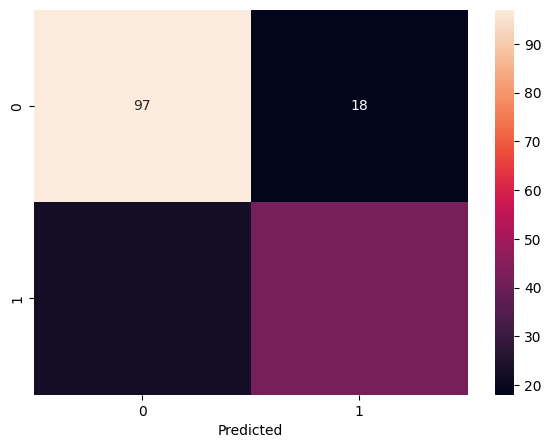

In [129]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')

### Interpretation of CM

1. `TP` : The model `correctly` predicted 97 instances as `positive` which actually was Positive
2. `FP` : The model `incorrectly` predicted 18 instances as `positive` which actually was Negative
3. `FN` : The model `incorrectly` predicted 22 instances as `Negative` which actually was Positive
4. `TN` : The model `correctly` predicted 42 instances as `Negative` which actually was Negative

#### Classfication Report

**Classification Report**
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support your trained classification model.




In [130]:
from sklearn.metrics import classification_report, accuracy_score
# Assuming y_test and y_predicted are your true labels and predicted labels respectively
accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_predicted)
print(report)

Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       115
           1       0.70      0.66      0.68        64

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.78      0.77       179



- Accuracy: The overall accuracy of the model, which is 0.78 or 78%.
- Class 0: The model performs well with high precision (0.82) and recall (0.84), indicating it correctly identifies most of the true negatives and has few false positives.
- Class 1: The model has lower precision (0.71) and recall (0.68), suggesting it struggles more with correctly identifying true positives and has more false negatives.

- Overall, the model has a decent performance with an accuracy of around 78%, but there is room for improvement, especially in predicting Class 1
